In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import pydot
from matplotlib import pyplot as plt
from keras import Input, Model, layers, Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import np_utils


#sklearn 
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

1


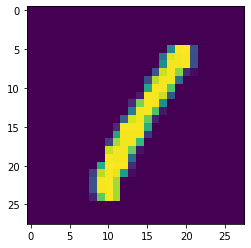

In [3]:
i = 3
print(y_train[i])
plt.imshow(X_train[i])

# DataSet Preparation

In [4]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


#### Example

In [5]:
n = 10
np_utils.to_categorical(1, n)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
classes = 10
print(y_train.shape)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)

(60000,)
(60000, 10)


# Model Building

In [7]:
Model = Sequential()
Model.add(Dense(512, input_shape=(784,), activation='relu'))
Model.add(Dropout(0.2))
Model.add(Dense(512, activation='relu'))
Model.add(Dropout(0.2))
Model.add(Dense(10, activation='softmax'))

W0921 14:00:29.359708 140327267407680 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0921 14:00:29.394347 140327267407680 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 14:00:29.397154 140327267407680 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0921 14:00:29.418223 140327267407680 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site

In [8]:
Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [9]:
Model.compile('Adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0921 14:00:29.570544 140327267407680 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0921 14:00:29.617369 140327267407680 deprecation_wrapper.py:119] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [10]:
Model.fit(X_train, y_train, batch_size=128, epochs=20,)

W0921 14:00:29.712677 140327267407680 deprecation.py:323] From /home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2495 - acc: 0.9245
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.1005 - acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0716 - acc: 0.9775
Epoch 4/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0559 - acc: 0.9822
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0463 - acc: 0.9847
Epoch 6/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0391 - acc: 0.9873
Epoch 7/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0351 - acc: 0.9883
Epoch 8/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0321 - acc: 0.9897
Epoch 9/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0267 - acc: 0.9910
Epoch 10/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0252 - a

In [11]:
Model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 33us/step


[0.0661068175832946, 0.9854]

In [12]:
predictions = Model.predict(X_test)


In [18]:
# Model.predict(X_test[0])

X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
Y_pred = Model.predict_classes(X_test)

# Save and Load Neural Network Model 

    - You can also save model architecture alone to Json
    - Also only model weights 

In [14]:
Model.save('Mnist_NN.h5')

In [15]:
from keras.models import load_model

loaded_model = load_model('Mnist_NN.h5')

In [16]:
loaded_model.predict_classes(X_test)

array([7, 2, 1, ..., 4, 5, 6])